In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy

In [2]:
#Loading the data
df = pd.read_csv('boston_housing.csv')

In [3]:
df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


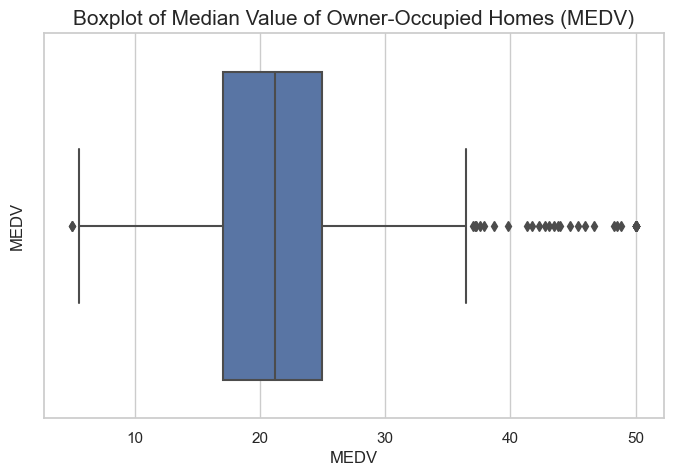

In [5]:
#Boxplot for the 'Median value of owner-occupied homes'
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["MEDV"])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)', fontsize=15)
plt.ylabel('MEDV', fontsize=12)
plt.show()

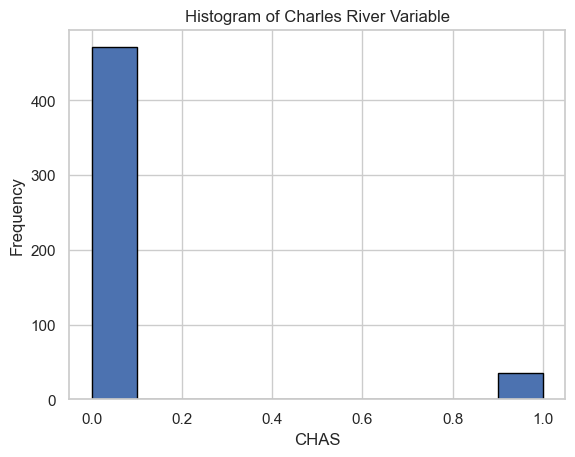

In [6]:
#Histogram for the 'Charles River variable'
plt.hist(df['CHAS'],edgecolor='black')
plt.title('Histogram of Charles River Variable')
plt.xlabel('CHAS')
plt.ylabel('Frequency')
plt.show()


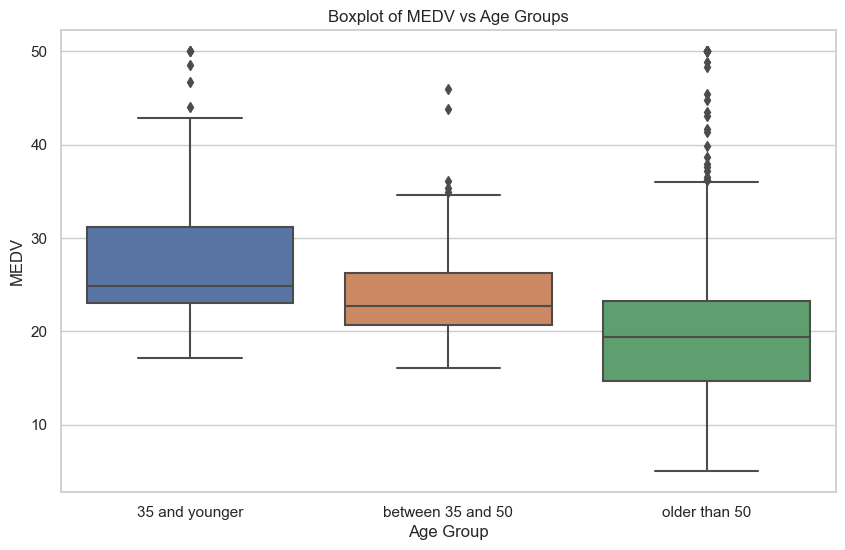

In [7]:
#Boxplot for the MEDV variable vs the AGE variable the age variable into three groups of 35 years and younger, between 35 and 50 years and older
x = [0, 35, 50, 100]
labels = ['35 and younger', 'between 35 and 50', 'older than 50']
df['AGE_group'] = pd.cut(df['AGE'], bins=x, labels=labels)
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=df)
plt.title('Boxplot of MEDV vs Age Groups')
plt.xlabel('Age Group')
plt.ylabel('MEDV')
plt.show()

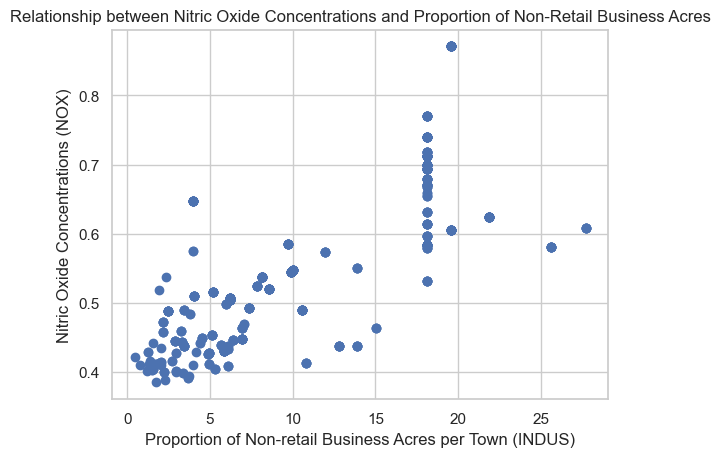

Correlation coefficient between NOX and INDUS: 0.7636514469209147
Its highly positive relationship


In [8]:
#Scatter plot the relationship between 'Nitric oxide concentrations and the proportion of non-retail business acres per town'
plt.scatter(df['INDUS'], df['NOX'])
plt.xlabel('Proportion of Non-retail Business Acres per Town (INDUS)')
plt.ylabel('Nitric Oxide Concentrations (NOX)')
plt.title('Relationship between Nitric Oxide Concentrations and Proportion of Non-Retail Business Acres')
plt.show()
correlation = df['NOX'].corr(df['INDUS'])
print(f'Correlation coefficient between NOX and INDUS: {correlation}')
if correlation == 0:
    print('Its no relationship')
elif correlation <= 0.5:
    print('Its moderate relationship')    
else:
    print('Its highly positive relationship')

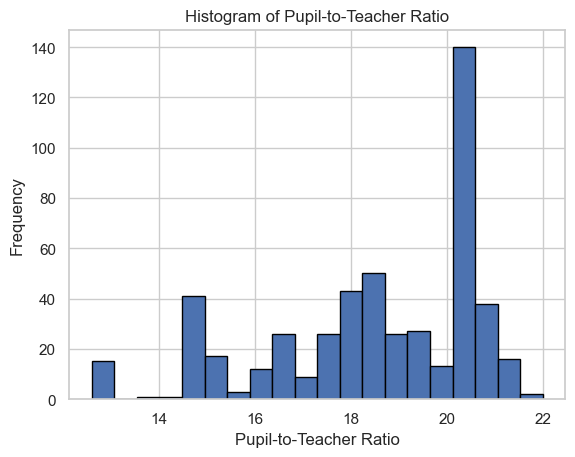

In [9]:
#Histogram for the pupil to teacher ratio variable
plt.hist(df['PTRATIO'], bins=20, edgecolor='black')
plt.title('Histogram of Pupil-to-Teacher Ratio')
plt.xlabel('Pupil-to-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

In [10]:
#Relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
z = df['NOX'].median()
x = np.array(df[df['NOX'] > z]['INDUS'])
y = np.array(df[df['NOX'] <= z]['INDUS'])
t, p_value = stats.ttest_ind(x, y, axis=0)
Ho = "No relationship between Nitric oxide concentrations and proportion of non-retail business"
Ha = "There is a relationship between Nitric oxide concentrations and proportion of non-retail business"
print(f'P-value: {p_value}')
if p_value < 0.05:
    print(f'{Ha} as the p_value({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value({p_value}) > 0.05')

P-value: 7.318383529149118e-112
There is a relationship between Nitric oxide concentrations and proportion of non-retail business as the p_value(7.318383529149118e-112) < 0.05
